In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
match_data = pd.read_csv('match_data.csv')
match_info = pd.read_csv('match_info_data.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_11240\273796773.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('match_data.csv')


In [3]:
match_data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982


In [4]:
match_data['season'].unique()

array([2023, 2022, '2022', '2021', '2020/21', '2019', 2019, 2018, 2017,
       2016, 2015, 2014, 2013, 2012, 2011, '2011', '2009/10', '2009',
       '2007/08'], dtype=object)

In [5]:
match_data['season'] = match_data['season'].astype(str)

In [6]:
match_data["season"] = match_data["season"].replace({"2007/08": "2008", "2008/09": "2009",'2009/10':'2010','2020/21':'2020'})

In [7]:
match_data.fillna(0,inplace=True)

In [8]:
#columns
match_data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [9]:
help_data = match_data[['match_id', 'season', 'innings', 'ball','runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes','penalty',]]
    

In [10]:
help_data 

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
0,1370353,2023,1,0.1,0,0,0.0,0.0,0.0,0.0,0.0
1,1370353,2023,1,0.2,0,0,0.0,0.0,0.0,0.0,0.0
2,1370353,2023,1,0.3,1,0,0.0,0.0,0.0,0.0,0.0
3,1370353,2023,1,0.4,1,0,0.0,0.0,0.0,0.0,0.0
4,1370353,2023,1,0.5,1,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243812,335982,2008,2,14.5,0,1,0.0,0.0,0.0,1.0,0.0
243813,335982,2008,2,14.6,1,0,0.0,0.0,0.0,0.0,0.0
243814,335982,2008,2,14.7,0,0,0.0,0.0,0.0,0.0,0.0
243815,335982,2008,2,15.1,0,1,1.0,0.0,0.0,0.0,0.0


In [11]:


# Convert 'ball' column into over format (e.g., 0.1 to 1 ball, 1.0 to next over)
match_data['over'] = match_data['ball'].astype(str).str.split('.').str[0].astype(int) + (match_data['ball'].astype(str).str.split('.').str[1].astype(int) / 6)

# Calculate total runs (runs off bat + extras)
match_data['total_runs'] = match_data['runs_off_bat'] + match_data['extras']

# Count only legal deliveries (excluding wides and no-balls)
match_data['legal_ball'] = ((match_data['wides'] == 0) & (match_data['noballs'] == 0)).astype(int)

# Aggregate by match and innings
match_stats = match_data.groupby(['match_id', 'season', 'innings','batting_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('legal_ball', 'sum')
).reset_index()

match_stats = match_stats.drop_duplicates()
match_stats

,match_id,season,innings,batting_team,total_runs,total_balls
0,335982,2008,1,Kolkata Knight Riders,222,120
1,335982,2008,2,Royal Challengers Bangalore,82,91
2,335983,2008,1,Chennai Super Kings,240,120
3,335983,2008,2,Kings XI Punjab,207,120
4,335984,2008,1,Rajasthan Royals,129,120
...,...,...,...,...,...,...
2070,1370351,2023,2,Lucknow Super Giants,101,99
2071,1370352,2023,1,Gujarat Titans,233,120
2072,1370352,2023,2,Mumbai Indians,171,110
2073,1370353,2023,1,Gujarat Titans,214,120


In [12]:
match_stats['season'].value_counts()


season
2013    156
2012    148
2022    148
2023    147
2011    145
2020    130
2019    124
2010    122
2021    122
2014    122
2016    120
2018    120
2017    120
2015    119
2009    116
2008    116
Name: count, dtype: int64

In [13]:
Total_matches = len(match_stats)/2
Total_matches

1037.5

In [14]:
# Convert 'ball' column into over format (e.g., 0.1 to 1 ball, 1.0 to next over)
match_data['over'] = match_data['ball'].astype(str).str.split('.').str[0].astype(int) + (match_data['ball'].astype(str).str.split('.').str[1].astype(int) / 6)

# Calculate total runs (runs off bat + extras)
match_data['total_runs'] = match_data['runs_off_bat'] + match_data['extras']

# Count only legal deliveries (excluding wides and no-balls)
match_data['legal_ball'] = ((match_data['wides'] == 0) & (match_data['noballs'] == 0)).astype(int)

# Aggregate by match and innings
match_stats = match_data.groupby(['match_id', 'season', 'innings','batting_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('legal_ball', 'sum')
).reset_index()

match_stats = match_stats.drop_duplicates()
match_stats

,match_id,season,innings,batting_team,total_runs,total_balls
0,335982,2008,1,Kolkata Knight Riders,222,120
1,335982,2008,2,Royal Challengers Bangalore,82,91
2,335983,2008,1,Chennai Super Kings,240,120
3,335983,2008,2,Kings XI Punjab,207,120
4,335984,2008,1,Rajasthan Royals,129,120
...,...,...,...,...,...,...
2070,1370351,2023,2,Lucknow Super Giants,101,99
2071,1370352,2023,1,Gujarat Titans,233,120
2072,1370352,2023,2,Mumbai Indians,171,110
2073,1370353,2023,1,Gujarat Titans,214,120


In [15]:
#Runs by players
runs_by_players = match_data.groupby(['match_id','striker','season','batting_team']).agg(total_runs = ('total_runs','sum'),total_balls=('legal_ball','count')).reset_index()
runs_by_players


,match_id,striker,season,batting_team,total_runs,total_balls
0,335982,AA Noffke,2008,Royal Challengers Bangalore,11,12
1,335982,B Akhil,2008,Royal Challengers Bangalore,0,2
2,335982,BB McCullum,2008,Kolkata Knight Riders,169,77
3,335982,CL White,2008,Royal Challengers Bangalore,6,10
4,335982,DJ Hussey,2008,Kolkata Knight Riders,12,12
...,...,...,...,...,...,...
15395,1370353,RD Gaikwad,2023,Chennai Super Kings,26,16
15396,1370353,Rashid Khan,2023,Gujarat Titans,1,2
15397,1370353,S Dube,2023,Chennai Super Kings,32,21
15398,1370353,Shubman Gill,2023,Gujarat Titans,39,20


In [16]:
##total Matchs in every season
total_mathcs_season = match_data.groupby('season')['match_id'].nunique().reset_index()
total_mathcs_season.columns = ['season','total_number_matches']
total_mathcs_season.sort_values(by='season')

,season,total_number_matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [17]:
sum(total_mathcs_season['total_number_matches'])

1024

In [18]:
each_match_season = match_stats.drop_duplicates(keep='first',subset='match_id')

In [19]:

each_match_season

,match_id,season,innings,batting_team,total_runs,total_balls
0,335982,2008,1,Kolkata Knight Riders,222,120
2,335983,2008,1,Chennai Super Kings,240,120
4,335984,2008,1,Rajasthan Royals,129,120
6,335985,2008,1,Mumbai Indians,165,120
8,335986,2008,1,Deccan Chargers,110,112
...,...,...,...,...,...,...
2065,1359544,2023,1,Royal Challengers Bangalore,197,120
2067,1370350,2023,1,Chennai Super Kings,172,120
2069,1370351,2023,1,Mumbai Indians,182,120
2071,1370352,2023,1,Gujarat Titans,233,120


In [20]:
each_match_season2 = match_stats.drop_duplicates(keep='last',subset='match_id')
each_match_season2

,match_id,season,innings,batting_team,total_runs,total_balls
1,335982,2008,2,Royal Challengers Bangalore,82,91
3,335983,2008,2,Kings XI Punjab,207,120
5,335984,2008,2,Delhi Daredevils,132,91
7,335985,2008,2,Royal Challengers Bangalore,166,118
9,335986,2008,2,Kolkata Knight Riders,112,114
...,...,...,...,...,...,...
2066,1359544,2023,2,Gujarat Titans,198,115
2068,1370350,2023,2,Gujarat Titans,157,120
2070,1370351,2023,2,Lucknow Super Giants,101,99
2072,1370352,2023,2,Mumbai Indians,171,110


In [21]:
matches_in_each_season = each_match_season.merge(each_match_season2,on='match_id')

In [22]:
matches_in_each_season.drop(columns=['season_y','innings_x','innings_y'],inplace=True)

In [23]:
#matches stastus
matches_in_each_season

,match_id,season_x,batting_team_x,total_runs_x,total_balls_x,batting_team_y,total_runs_y,total_balls_y
0,335982,2008,Kolkata Knight Riders,222,120,Royal Challengers Bangalore,82,91
1,335983,2008,Chennai Super Kings,240,120,Kings XI Punjab,207,120
2,335984,2008,Rajasthan Royals,129,120,Delhi Daredevils,132,91
3,335985,2008,Mumbai Indians,165,120,Royal Challengers Bangalore,166,118
4,335986,2008,Deccan Chargers,110,112,Kolkata Knight Riders,112,114
...,...,...,...,...,...,...,...,...
1019,1359544,2023,Royal Challengers Bangalore,197,120,Gujarat Titans,198,115
1020,1370350,2023,Chennai Super Kings,172,120,Gujarat Titans,157,120
1021,1370351,2023,Mumbai Indians,182,120,Lucknow Super Giants,101,99
1022,1370352,2023,Gujarat Titans,233,120,Mumbai Indians,171,110


In [24]:
#total number of wicket by each team in each match
match_wicket = match_data.groupby(['match_id', 'season', 'innings','bowling_team'])['wicket_type'].value_counts().reset_index()
match_wicket =match_wicket[(match_wicket['wicket_type']!=0)]

wicket=match_wicket.groupby(['match_id', 'season', 'innings','bowling_team']).sum()['count'].reset_index()
wicket.rename(columns={'count':'wicket_no'},inplace=True)
wicket

,match_id,season,innings,bowling_team,wicket_no
0,335982,2008,1,Royal Challengers Bangalore,3
1,335982,2008,2,Kolkata Knight Riders,10
2,335983,2008,1,Kings XI Punjab,5
3,335983,2008,2,Chennai Super Kings,4
4,335984,2008,1,Delhi Daredevils,8
...,...,...,...,...,...
2039,1370351,2023,2,Mumbai Indians,10
2040,1370352,2023,1,Mumbai Indians,3
2041,1370352,2023,2,Gujarat Titans,10
2042,1370353,2023,1,Chennai Super Kings,4


In [25]:
runs_by_players

,match_id,striker,season,batting_team,total_runs,total_balls
0,335982,AA Noffke,2008,Royal Challengers Bangalore,11,12
1,335982,B Akhil,2008,Royal Challengers Bangalore,0,2
2,335982,BB McCullum,2008,Kolkata Knight Riders,169,77
3,335982,CL White,2008,Royal Challengers Bangalore,6,10
4,335982,DJ Hussey,2008,Kolkata Knight Riders,12,12
...,...,...,...,...,...,...
15395,1370353,RD Gaikwad,2023,Chennai Super Kings,26,16
15396,1370353,Rashid Khan,2023,Gujarat Titans,1,2
15397,1370353,S Dube,2023,Chennai Super Kings,32,21
15398,1370353,Shubman Gill,2023,Gujarat Titans,39,20


In [26]:
palyers_runs = match_data.groupby(['match_id','batting_team','striker','season','bowling_team']).agg(total_runs = ('total_runs','sum'),total_balls=('legal_ball','count')).reset_index()
palyers_runs

,match_id,batting_team,striker,season,bowling_team,total_runs,total_balls
0,335982,Kolkata Knight Riders,BB McCullum,2008,Royal Challengers Bangalore,169,77
1,335982,Kolkata Knight Riders,DJ Hussey,2008,Royal Challengers Bangalore,12,12
2,335982,Kolkata Knight Riders,Mohammad Hafeez,2008,Royal Challengers Bangalore,5,3
3,335982,Kolkata Knight Riders,RT Ponting,2008,Royal Challengers Bangalore,24,20
4,335982,Kolkata Knight Riders,SC Ganguly,2008,Royal Challengers Bangalore,12,12
...,...,...,...,...,...,...,...
15395,1370353,Gujarat Titans,B Sai Sudharsan,2023,Chennai Super Kings,97,48
15396,1370353,Gujarat Titans,HH Pandya,2023,Chennai Super Kings,22,12
15397,1370353,Gujarat Titans,Rashid Khan,2023,Chennai Super Kings,1,2
15398,1370353,Gujarat Titans,Shubman Gill,2023,Chennai Super Kings,39,20


In [27]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,over,total_runs,legal_ball
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0.0,0.0,0,0,0.0,0.0,1370353,0.166667,0,1
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0.0,0.0,0,0,0.0,0.0,1370353,0.333333,0,1
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0.0,0.0,0,0,0.0,0.0,1370353,0.500000,1,1
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,0.0,0.0,0,0,0.0,0.0,1370353,0.666667,1,1
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0.0,0.0,0,0,0.0,0.0,1370353,0.833333,1,1


In [28]:
match_data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id', 'over', 'total_runs',
       'legal_ball'],
      dtype='object')

In [29]:
#wicket taken by players

bowler_wicket = match_data.groupby(['match_id','bowler','season','bowling_team'])['wicket_type'].value_counts().reset_index()
bowler_wicket = bowler_wicket[(bowler_wicket['wicket_type']!=0)]
bowler_wicket = bowler_wicket.groupby(['match_id','bowler','season','bowling_team'])['count'].sum().reset_index()
bowler_wicket



,match_id,bowler,season,bowling_team,count
0,335982,AA Noffke,2008,Royal Challengers Bangalore,1
1,335982,AB Agarkar,2008,Kolkata Knight Riders,3
2,335982,AB Dinda,2008,Kolkata Knight Riders,2
3,335982,I Sharma,2008,Kolkata Knight Riders,1
4,335982,JH Kallis,2008,Royal Challengers Bangalore,1
...,...,...,...,...,...
7248,1370353,DL Chahar,2023,Chennai Super Kings,1
7249,1370353,M Pathirana,2023,Chennai Super Kings,2
7250,1370353,MM Sharma,2023,Gujarat Titans,3
7251,1370353,Noor Ahmad,2023,Gujarat Titans,2


In [30]:
#total runs by player in each season
total_runs_player = palyers_runs.groupby(['striker']).sum()['total_runs'].reset_index()
total_runs_player

,striker,total_runs
0,A Ashish Reddy,288
1,A Badoni,435
2,A Chandila,4
3,A Chopra,58
4,A Choudhary,25
...,...,...
632,Yashpal Singh,49
633,Younis Khan,3
634,Yudhvir Singh,1
635,Yuvraj Singh,2884


In [31]:
#wicket players
wicket_by_bowler = bowler_wicket.groupby(['bowler']).sum()['count'].reset_index()
wicket_by_bowler

,bowler,count
0,A Ashish Reddy,19
1,A Badoni,2
2,A Chandila,11
3,A Choudhary,5
4,A Flintoff,2
...,...,...
431,Yash Dayal,15
432,Yash Thakur,15
433,Yudhvir Singh,3
434,Yuvraj Singh,39


In [32]:
#usefuldata:
"""
wicket
total_runs_player
wicket_by_bowler
bowler_wicket
palyers_runs
seaon_wise_runs_wise_players

"""

'\nwicket\ntotal_runs_player\nwicket_by_bowler\nbowler_wicket\npalyers_runs\nseaon_wise_runs_wise_players\n\n'

In [33]:
seaon_wise_runs_wise_players = palyers_runs.groupby(['striker','season'])['total_runs'].sum().reset_index().sort_values('season')
seaon_wise_runs_wise_players

,striker,season,total_runs
551,DJ Thornely,2008,53
1575,PP Chawla,2008,93
2371,WPUJC Vaas,2008,23
1871,S Dhawan,2008,365
1870,S Chanderpaul,2008,27
...,...,...,...
1031,KM Asif,2023,0
260,Aman Hakim Khan,2023,121
1030,KL Rahul,2023,287
2261,Tilak Varma,2023,364


In [34]:
match_info.drop(columns=['season','umpire1','umpire2','umpire3','toss_decision','result'],inplace=True)

In [35]:
match_info.rename(columns={'id':'match_id'},inplace=True)

In [36]:
match_info.columns

Index(['match_id', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

In [37]:
matches_in_each_season.columns

Index(['match_id', 'season_x', 'batting_team_x', 'total_runs_x',
       'total_balls_x', 'batting_team_y', 'total_runs_y', 'total_balls_y'],
      dtype='object')

In [38]:
match_information = matches_in_each_season.merge(match_info,on='match_id')[['match_id', 'season_x', 'batting_team_x', 'total_runs_x',
       'total_balls_x', 'batting_team_y', 'total_runs_y', 'total_balls_y','city','date', 'toss_winner','winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue']]

In [39]:
#change the columns name for better read

match_information.rename(columns={
    'season_x': 'season',
    'batting_team_x': 'team_1',
    'total_runs_x': 'total_runs_team_1',
    'total_balls_x': 'total_balls_team_1',
    'batting_team_y': 'team_2',
    'total_runs_y': 'total_runs_team_2',
    'total_balls_y': 'total_balls_team_2',
    'date': 'match_date',
    'winner': 'match_winner'
}, inplace=True)

In [40]:
match_information

,match_id,season,team_1,total_runs_team_1,total_balls_team_1,team_2,total_runs_team_2,total_balls_team_2,city,match_date,toss_winner,match_winner,win_by_runs,win_by_wickets,player_of_match,venue
0,335982,2008,Kolkata Knight Riders,222,120,Royal Challengers Bangalore,82,91,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
1,335983,2008,Chennai Super Kings,240,120,Kings XI Punjab,207,120,Chandigarh,2008/04/19,Chennai Super Kings,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
2,335984,2008,Rajasthan Royals,129,120,Delhi Daredevils,132,91,Delhi,2008/04/19,Rajasthan Royals,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
3,335985,2008,Mumbai Indians,165,120,Royal Challengers Bangalore,166,118,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
4,335986,2008,Deccan Chargers,110,112,Kolkata Knight Riders,112,114,Kolkata,2008/04/20,Deccan Chargers,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Royal Challengers Bangalore,197,120,Gujarat Titans,198,115,Bengaluru,2023/05/21,Gujarat Titans,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru"
1020,1370350,2023,Chennai Super Kings,172,120,Gujarat Titans,157,120,Chennai,2023/05/23,Gujarat Titans,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai"
1021,1370351,2023,Mumbai Indians,182,120,Lucknow Super Giants,101,99,Chennai,2023/05/24,Mumbai Indians,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai"
1022,1370352,2023,Gujarat Titans,233,120,Mumbai Indians,171,110,Ahmedabad,2023/05/26,Mumbai Indians,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad"


In [41]:
wicket

,match_id,season,innings,bowling_team,wicket_no
0,335982,2008,1,Royal Challengers Bangalore,3
1,335982,2008,2,Kolkata Knight Riders,10
2,335983,2008,1,Kings XI Punjab,5
3,335983,2008,2,Chennai Super Kings,4
4,335984,2008,1,Delhi Daredevils,8
...,...,...,...,...,...
2039,1370351,2023,2,Mumbai Indians,10
2040,1370352,2023,1,Mumbai Indians,3
2041,1370352,2023,2,Gujarat Titans,10
2042,1370353,2023,1,Chennai Super Kings,4


In [42]:
total_runs_player

,striker,total_runs
0,A Ashish Reddy,288
1,A Badoni,435
2,A Chandila,4
3,A Chopra,58
4,A Choudhary,25
...,...,...
632,Yashpal Singh,49
633,Younis Khan,3
634,Yudhvir Singh,1
635,Yuvraj Singh,2884


In [43]:
wicket_by_bowler

,bowler,count
0,A Ashish Reddy,19
1,A Badoni,2
2,A Chandila,11
3,A Choudhary,5
4,A Flintoff,2
...,...,...
431,Yash Dayal,15
432,Yash Thakur,15
433,Yudhvir Singh,3
434,Yuvraj Singh,39


In [44]:
bowler_wicket

,match_id,bowler,season,bowling_team,count
0,335982,AA Noffke,2008,Royal Challengers Bangalore,1
1,335982,AB Agarkar,2008,Kolkata Knight Riders,3
2,335982,AB Dinda,2008,Kolkata Knight Riders,2
3,335982,I Sharma,2008,Kolkata Knight Riders,1
4,335982,JH Kallis,2008,Royal Challengers Bangalore,1
...,...,...,...,...,...
7248,1370353,DL Chahar,2023,Chennai Super Kings,1
7249,1370353,M Pathirana,2023,Chennai Super Kings,2
7250,1370353,MM Sharma,2023,Gujarat Titans,3
7251,1370353,Noor Ahmad,2023,Gujarat Titans,2


In [45]:
palyers_runs

,match_id,batting_team,striker,season,bowling_team,total_runs,total_balls
0,335982,Kolkata Knight Riders,BB McCullum,2008,Royal Challengers Bangalore,169,77
1,335982,Kolkata Knight Riders,DJ Hussey,2008,Royal Challengers Bangalore,12,12
2,335982,Kolkata Knight Riders,Mohammad Hafeez,2008,Royal Challengers Bangalore,5,3
3,335982,Kolkata Knight Riders,RT Ponting,2008,Royal Challengers Bangalore,24,20
4,335982,Kolkata Knight Riders,SC Ganguly,2008,Royal Challengers Bangalore,12,12
...,...,...,...,...,...,...,...
15395,1370353,Gujarat Titans,B Sai Sudharsan,2023,Chennai Super Kings,97,48
15396,1370353,Gujarat Titans,HH Pandya,2023,Chennai Super Kings,22,12
15397,1370353,Gujarat Titans,Rashid Khan,2023,Chennai Super Kings,1,2
15398,1370353,Gujarat Titans,Shubman Gill,2023,Chennai Super Kings,39,20


In [46]:
seaon_wise_runs_wise_players

,striker,season,total_runs
551,DJ Thornely,2008,53
1575,PP Chawla,2008,93
2371,WPUJC Vaas,2008,23
1871,S Dhawan,2008,365
1870,S Chanderpaul,2008,27
...,...,...,...
1031,KM Asif,2023,0
260,Aman Hakim Khan,2023,121
1030,KL Rahul,2023,287
2261,Tilak Varma,2023,364


In [47]:
pickle.dump(match_information, open('match_information.pkl','wb'))

In [48]:
pickle.dump(wicket, open('wicket.pkl','wb'))
pickle.dump(total_runs_player, open('total_runs_player.pkl','wb'))
pickle.dump(wicket_by_bowler, open('wicket_by_bowler.pkl','wb'))
pickle.dump(bowler_wicket, open('bowler_wicket.pkl','wb'))
pickle.dump(seaon_wise_runs_wise_players, open('seaon_wise_runs_wise_players.pkl','wb'))


In [49]:
pickle.dump(player_wicket_season, open('player_wicket.pkl','wb'))

NameError: name 'player_wicket_season' is not defined

In [ ]:
seaon_wise_runs_wise_players[seaon_wise_runs_wise_players['striker']=='S Dhawan']

In [51]:
for index, row in seaon_wise_runs_wise_players.iterrows():
    players = row['striker'].split(", ")  # Splitting on ", "
    for player in players:
       ## print(seaon_wise_runs_wise_players[seaon_wise_runs_wise_players['striker']==player])
        
        

_IncompleteInputError: incomplete input (3539924832.py, line 6)

In [ ]:
total_runs_player

In [52]:
'''
def plyer_runs(user_input):
        for index, row in total_runs_player.iterrows():
                    total_runs = row['striker'].split(", ")
                    for player in total_runs:
                        if user_input==player:
                            print(total_runs_player[total_runs_player['striker']==user_input]).row['total_runs'].sum()
                        else:
                            print('player not found')
        
User_input = input("enter the player name").strip() 
ob = plyer_runs(User_input)
print(ob)
'''

'\ndef plyer_runs(user_input):\n        for index, row in total_runs_player.iterrows():\n                    total_runs = row[\'striker\'].split(", ")\n                    for player in total_runs:\n                        if user_input==player:\n                            print(total_runs_player[total_runs_player[\'striker\']==user_input]).row[\'total_runs\'].sum()\n                        else:\n                            print(\'player not found\')\n        \nUser_input = input("enter the player name").strip() \nob = plyer_runs(User_input)\nprint(ob)\n'

In [53]:
def player_runs(user_input):
    # Filter rows where 'striker' matches user input
    filtered_data = total_runs_player[total_runs_player['striker'] == user_input]

    if not filtered_data.empty:
        total_runs = filtered_data['total_runs'].sum()  # Summing total runs
        return f"{user_input} has scored a total of {total_runs} runs."
    else:
        return "Player not found."

# Get user input
user_input = input("Enter the player name: ").strip()

# Call the function and print result
result = player_runs(user_input)
print(result)

Enter the player name:  ssss


Player not found.


In [54]:
seaon_wise_runs_wise_players.groupby(['season','striker'])['total_runs'].sum().reset_index()

,season,striker,total_runs
0,2008,A Chopra,45
1,2008,A Kumble,17
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,5
...,...,...,...
2441,2023,WP Saha,395
2442,2023,Washington Sundar,66
2443,2023,YBK Jaiswal,653
2444,2023,YV Dhull,16


In [55]:
match_information.shape

(1024, 16)

In [ ]:
match_information['match_winner'].value_counts()

In [56]:
match_information.groupby(['team_2','season'])['match_winner'].count().reset_index()

,team_2,season,match_winner
0,Chennai Super Kings,2008,7
1,Chennai Super Kings,2009,4
2,Chennai Super Kings,2010,7
3,Chennai Super Kings,2011,4
4,Chennai Super Kings,2012,6
...,...,...,...
131,Sunrisers Hyderabad,2019,6
132,Sunrisers Hyderabad,2020,9
133,Sunrisers Hyderabad,2021,8
134,Sunrisers Hyderabad,2022,11


In [57]:
player_wicket_season = bowler_wicket.groupby(['season','bowler'])['count'].sum().reset_index()
player_wicket_season

,season,bowler,count
0,2008,A Kumble,8
1,2008,A Mishra,11
2,2008,A Nehra,14
3,2008,A Nel,1
4,2008,AA Noffke,1
...,...,...,...
1515,2023,Washington Sundar,3
1516,2023,YS Chahal,22
1517,2023,Yash Dayal,2
1518,2023,Yash Thakur,15


In [65]:
match_information

,match_id,season,team_1,total_runs_team_1,total_balls_team_1,team_2,total_runs_team_2,total_balls_team_2,city,match_date,toss_winner,match_winner,win_by_runs,win_by_wickets,player_of_match,venue
0,335982,2008,Kolkata Knight Riders,222,120,Royal Challengers Bangalore,82,91,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
1,335983,2008,Chennai Super Kings,240,120,Kings XI Punjab,207,120,Chandigarh,2008/04/19,Chennai Super Kings,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
2,335984,2008,Rajasthan Royals,129,120,Delhi Daredevils,132,91,Delhi,2008/04/19,Rajasthan Royals,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
3,335985,2008,Mumbai Indians,165,120,Royal Challengers Bangalore,166,118,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
4,335986,2008,Deccan Chargers,110,112,Kolkata Knight Riders,112,114,Kolkata,2008/04/20,Deccan Chargers,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Royal Challengers Bangalore,197,120,Gujarat Titans,198,115,Bengaluru,2023/05/21,Gujarat Titans,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru"
1020,1370350,2023,Chennai Super Kings,172,120,Gujarat Titans,157,120,Chennai,2023/05/23,Gujarat Titans,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai"
1021,1370351,2023,Mumbai Indians,182,120,Lucknow Super Giants,101,99,Chennai,2023/05/24,Mumbai Indians,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai"
1022,1370352,2023,Gujarat Titans,233,120,Mumbai Indians,171,110,Ahmedabad,2023/05/26,Mumbai Indians,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad"


In [ ]:
total_runs_player

In [58]:
match_information


,match_id,season,team_1,total_runs_team_1,total_balls_team_1,team_2,total_runs_team_2,total_balls_team_2,city,match_date,toss_winner,match_winner,win_by_runs,win_by_wickets,player_of_match,venue
0,335982,2008,Kolkata Knight Riders,222,120,Royal Challengers Bangalore,82,91,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium
1,335983,2008,Chennai Super Kings,240,120,Kings XI Punjab,207,120,Chandigarh,2008/04/19,Chennai Super Kings,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
2,335984,2008,Rajasthan Royals,129,120,Delhi Daredevils,132,91,Delhi,2008/04/19,Rajasthan Royals,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
3,335985,2008,Mumbai Indians,165,120,Royal Challengers Bangalore,166,118,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
4,335986,2008,Deccan Chargers,110,112,Kolkata Knight Riders,112,114,Kolkata,2008/04/20,Deccan Chargers,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1359544,2023,Royal Challengers Bangalore,197,120,Gujarat Titans,198,115,Bengaluru,2023/05/21,Gujarat Titans,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru"
1020,1370350,2023,Chennai Super Kings,172,120,Gujarat Titans,157,120,Chennai,2023/05/23,Gujarat Titans,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai"
1021,1370351,2023,Mumbai Indians,182,120,Lucknow Super Giants,101,99,Chennai,2023/05/24,Mumbai Indians,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai"
1022,1370352,2023,Gujarat Titans,233,120,Mumbai Indians,171,110,Ahmedabad,2023/05/26,Mumbai Indians,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad"


In [ ]:
season_winner = match_information.groupby(['match_id','season','team_1'])['match_winner'].count().reset_index()
season_winner

In [ ]:
season_winner_2 = match_information.groupby(['match_id','season','team_2'])['match_winner'].count().reset_index()
season_winner_2

In [ ]:
season_match = season_winner[season_winner['season']=='2008']
season_match

In [ ]:
season_match_2 = season_winner_2[season_winner_2['season']=='2008']
season_match_2

In [60]:
season_winner= match_information.groupby('season').last()['match_winner'].reset_index()

<Axes: xlabel='match_winner'>

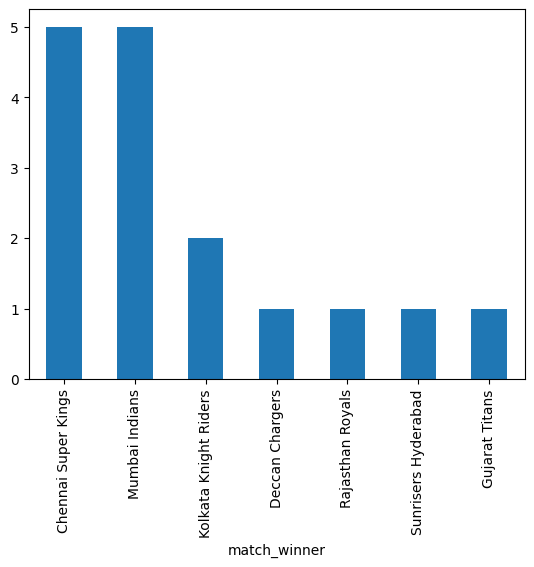

In [64]:
season_winner['match_winner'].value_counts().plot(kind='bar')